In [123]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [124]:
def display(img, cmap = None):
    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap)

In [125]:
img1 = './data/2024-06/2024-06-04-00/2024-06-04-00-00.jpg'
img2 = './data/2024-06/2024-06-04-00/2024-06-04-00-01.jpg'
img3 = './data/2024-06/2024-06-04-00/2024-06-04-00-02.jpg'
img4 = './data/2024-06/2024-06-04-00/2024-06-04-00-03.jpg'
img5 = './data/2024-06/2024-06-04-00/2024-06-04-00-04.jpg'
img6 = './data/2024-06/2024-06-04-00/2024-06-04-00-05.jpg'
img7 = './data/2024-06/2024-06-04-00/2024-06-04-00-06.jpg'

In [126]:
img1BGR = cv2.imread(img1)
img1Gray = cv2.cvtColor(img1BGR, cv2.COLOR_BGR2GRAY)
img2BGR = cv2.imread(img2)
img2Gray = cv2.cvtColor(img2BGR, cv2.COLOR_BGR2GRAY)
img3BGR = cv2.imread(img3)
img3Gray = cv2.cvtColor(img3BGR, cv2.COLOR_BGR2GRAY)
img4BGR = cv2.imread(img4)
img4Gray = cv2.cvtColor(img4BGR, cv2.COLOR_BGR2GRAY)
img5BGR = cv2.imread(img5)
img5Gray = cv2.cvtColor(img5BGR, cv2.COLOR_BGR2GRAY)
img6BGR = cv2.imread(img6)
img6Gray = cv2.cvtColor(img6BGR, cv2.COLOR_BGR2GRAY)
img6RGB = cv2.cvtColor(img6BGR, cv2.COLOR_BGR2RGB)

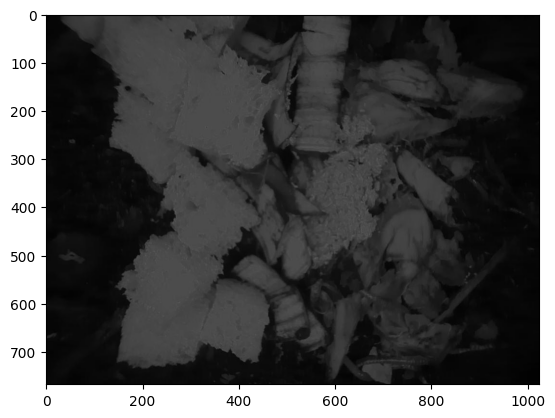

In [127]:
plt.imshow(img6RGB)

## Movement with createBackgroundSubtractorMOG2

In [128]:
backSub = cv2.createBackgroundSubtractorMOG2()

In [129]:
fgMask = backSub.apply(img1Gray)
fgMask = backSub.apply(img2Gray)
fgMask = backSub.apply(img3Gray)
fgMask = backSub.apply(img4Gray)
fgMask = backSub.apply(img5Gray)
fgMask = backSub.apply(img6Gray)

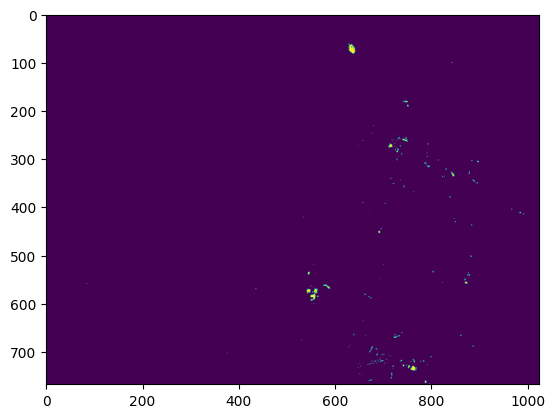

In [130]:
plt.imshow(fgMask)

## Movement with createBackgroundSubtractorKNN

In [131]:
backSub = cv2.createBackgroundSubtractorKNN()

In [132]:
fgMask = backSub.apply(img1Gray)
fgMask = backSub.apply(img2Gray)
fgMask = backSub.apply(img3Gray)
fgMask = backSub.apply(img4Gray)
fgMask = backSub.apply(img5Gray)
fgMask = backSub.apply(img6Gray)

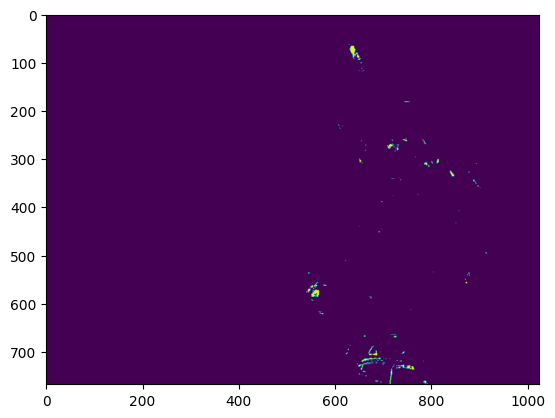

In [133]:
plt.imshow(fgMask)

## Applying contours

In [134]:
blur = cv2.GaussianBlur(fgMask, (11, 11), 0)

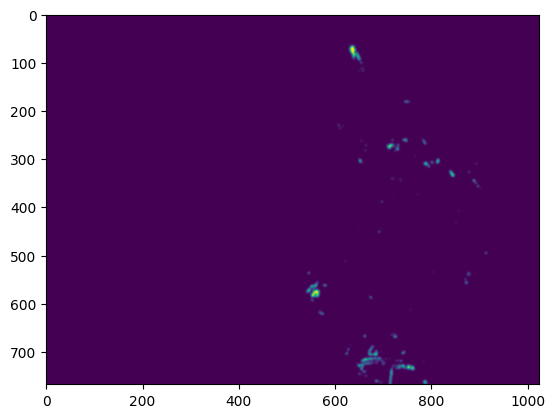

In [135]:
plt.imshow(blur)

In [136]:
canny = cv2.Canny(blur, 30, 150, 3)

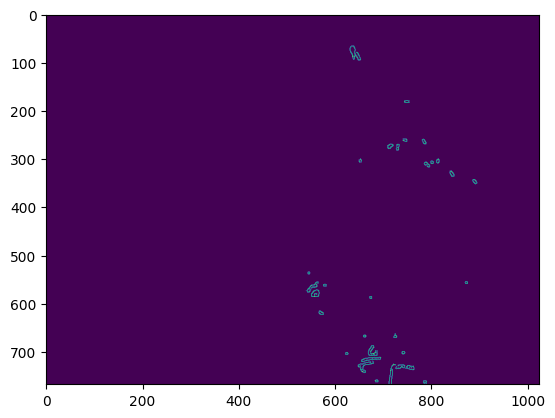

In [137]:
plt.imshow(canny)

In [138]:
dilated = cv2.dilate(canny, (1, 1), iterations=0)

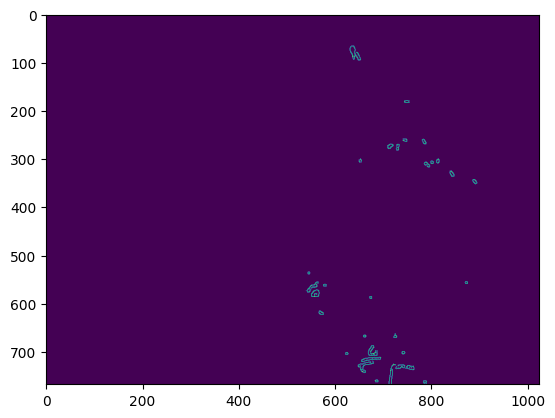

In [139]:
plt.imshow(dilated)

In [140]:
(contours, hierarchy) = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [141]:
res = cv2.drawContours(img6BGR, contours, -1, (255, 0, 0), 1)

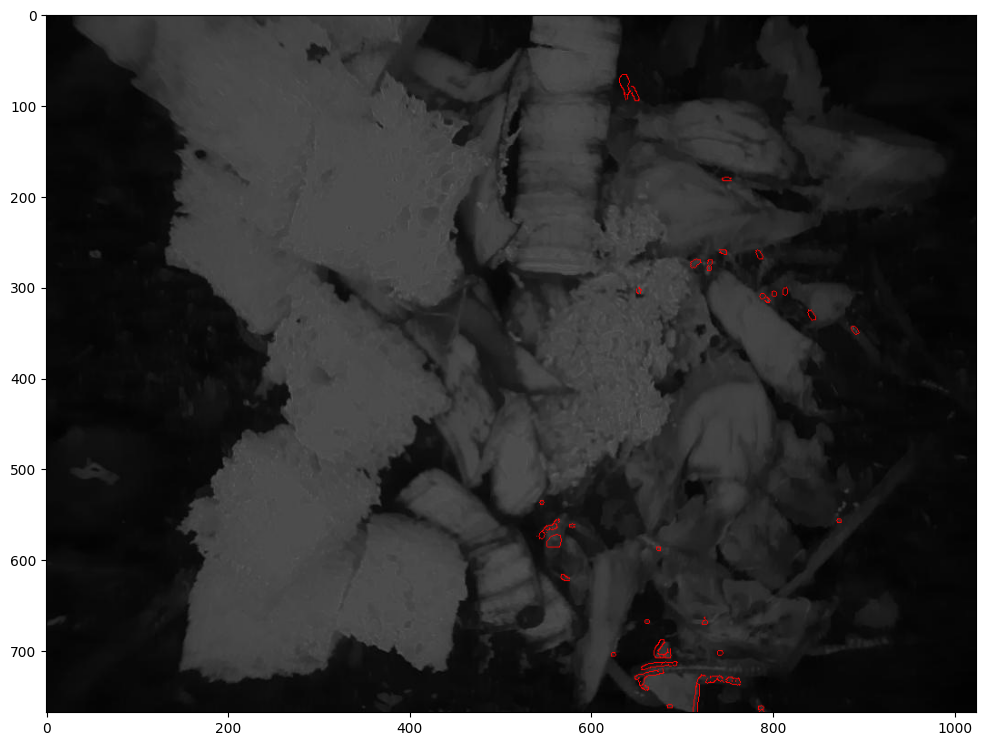

In [142]:
display(img6BGR)

## Mask all moving objects

In [143]:
imgMaskMovingObjects = cv2.imread(img6, 0)
imgContourMovingObjects = cv2.imread(img6, 0)

In [144]:
cv2.drawContours(imgContourMovingObjects, contours, -1, (255, 0, 0), 1)

array([[6, 5, 5, ..., 7, 7, 8],
       [6, 5, 5, ..., 7, 7, 8],
       [6, 5, 5, ..., 7, 7, 8],
       ...,
       [8, 8, 8, ..., 3, 3, 3],
       [8, 8, 8, ..., 3, 3, 3],
       [8, 8, 8, ..., 3, 3, 3]], dtype=uint8)

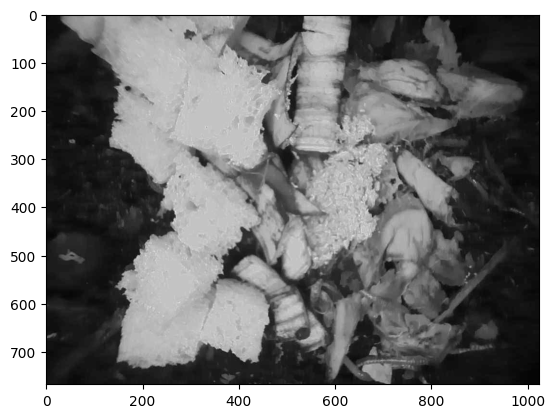

In [145]:
plt.imshow(imgMaskMovingObjects, cmap='gray')

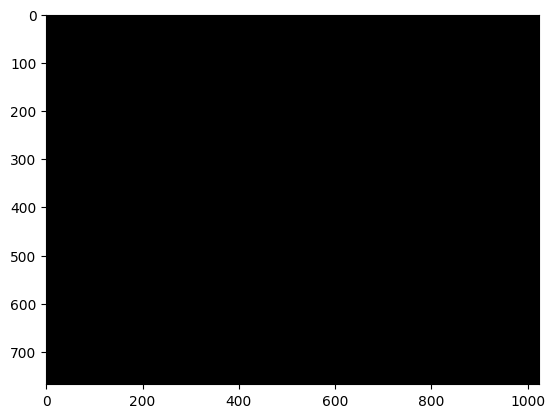

In [146]:
maskAll = np.zeros_like(imgMaskMovingObjects)
plt.imshow(maskAll, cmap='gray')

In [147]:
cv2.drawContours(maskAll, contours, -1, 255, -1)
print('create mask')

create mask


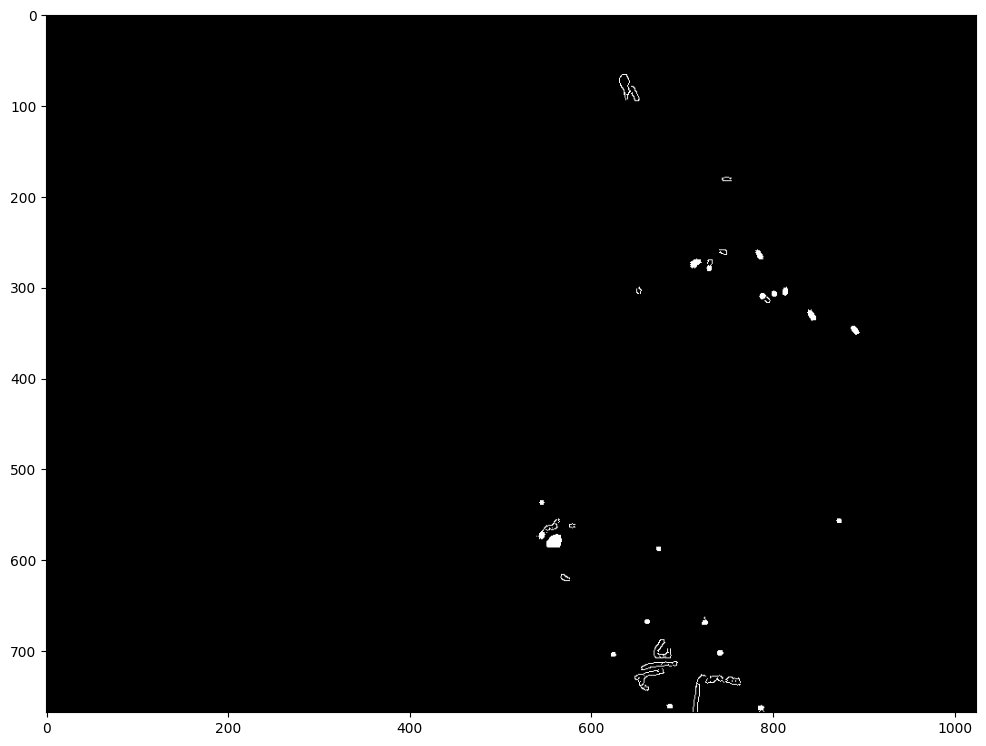

In [148]:
display(maskAll, cmap='gray')

In [149]:
outAll = np.zeros_like(imgMaskMovingObjects)
outAll[maskAll == 255] = imgMaskMovingObjects[maskAll == 255]

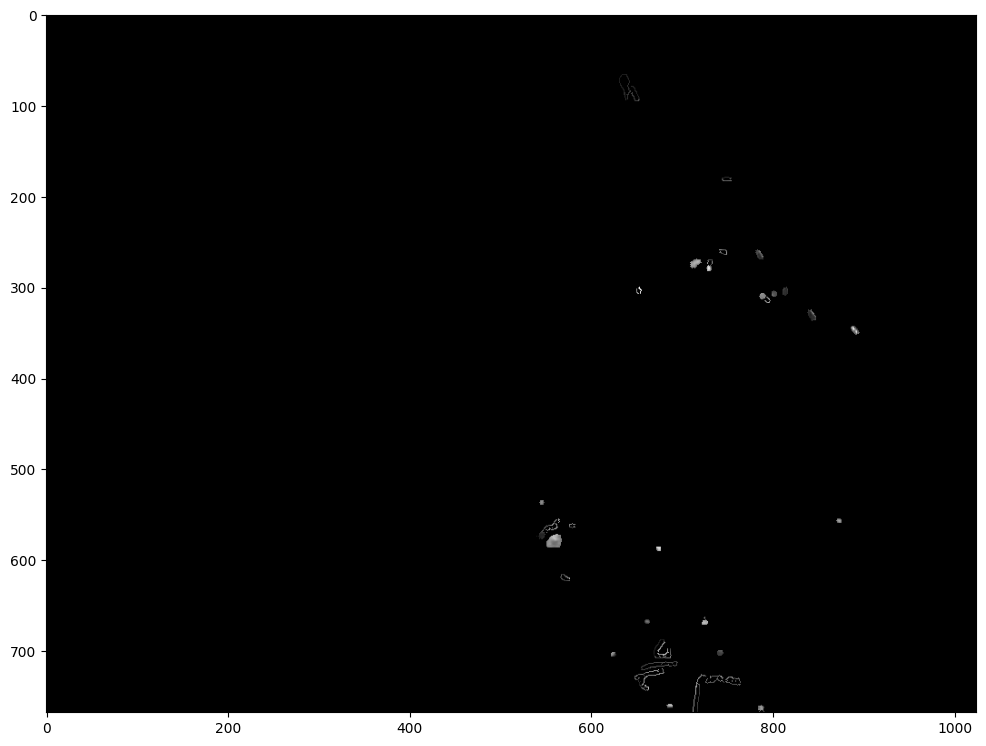

In [150]:
display(outAll, cmap='gray')

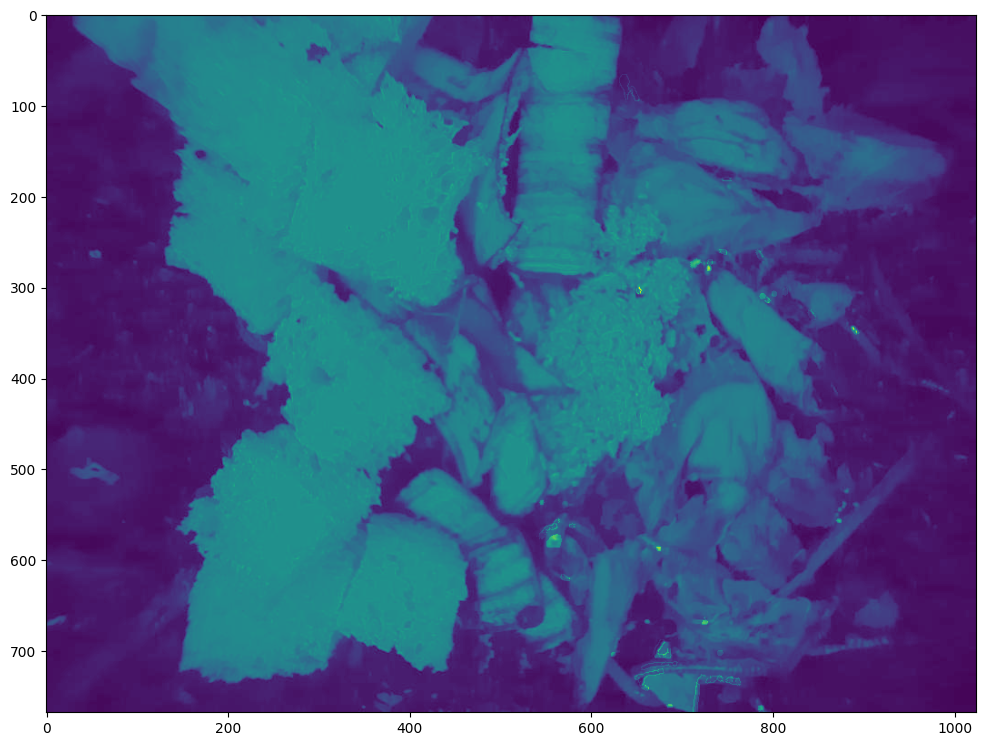

In [151]:
contrast = 1.8 # Contrast control ( 0 to 127)
brightness = 1.8 # Brightness control (0-100)

out2All = np.zeros_like(imgMaskMovingObjects)

# change brightness

out2All[maskAll != 255] = imgMaskMovingObjects[maskAll != 255]
lighterImage = cv2.addWeighted( imgMaskMovingObjects, contrast, imgMaskMovingObjects, 0, brightness)
out2All[maskAll == 255] = lighterImage[maskAll == 255]

display(out2All)

## Diff with Skimage

In [152]:

before_gray = cv2.cvtColor(before, cv2.COLOR_BGR2GRAY)
after_gray = cv2.cvtColor(after, cv2.COLOR_BGR2GRAY)

# Compute SSIM between the two images
(score, diff) = structural_similarity(before_gray, after_gray, full=True)
print("Image Similarity: {:.4f}%".format(score * 100))

# The diff image contains the actual image differences between the two images
# and is represented as a floating point data type in the range [0,1] 
# so we must convert the array to 8-bit unsigned integers in the range
# [0,255] before we can use it with OpenCV
diff = (diff * 255).astype("uint8")
diff_box = cv2.merge([diff, diff, diff])

# Threshold the difference image, followed by finding contours to
# obtain the regions of the two input images that differ
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]

mask = np.zeros(before.shape, dtype='uint8')
filled_after = after.copy()

for c in contours:
    area = cv2.contourArea(c)
    if area > 40:
        x,y,w,h = cv2.boundingRect(c)
        cv2.rectangle(before, (x, y), (x + w, y + h), (36,255,12), 2)
        cv2.rectangle(after, (x, y), (x + w, y + h), (36,255,12), 2)
        cv2.rectangle(diff_box, (x, y), (x + w, y + h), (36,255,12), 2)
        cv2.drawContours(mask, [c], 0, (255,255,255), -1)
        cv2.drawContours(filled_after, [c], 0, (0,255,0), -1)

Image Similarity: 97.2297%


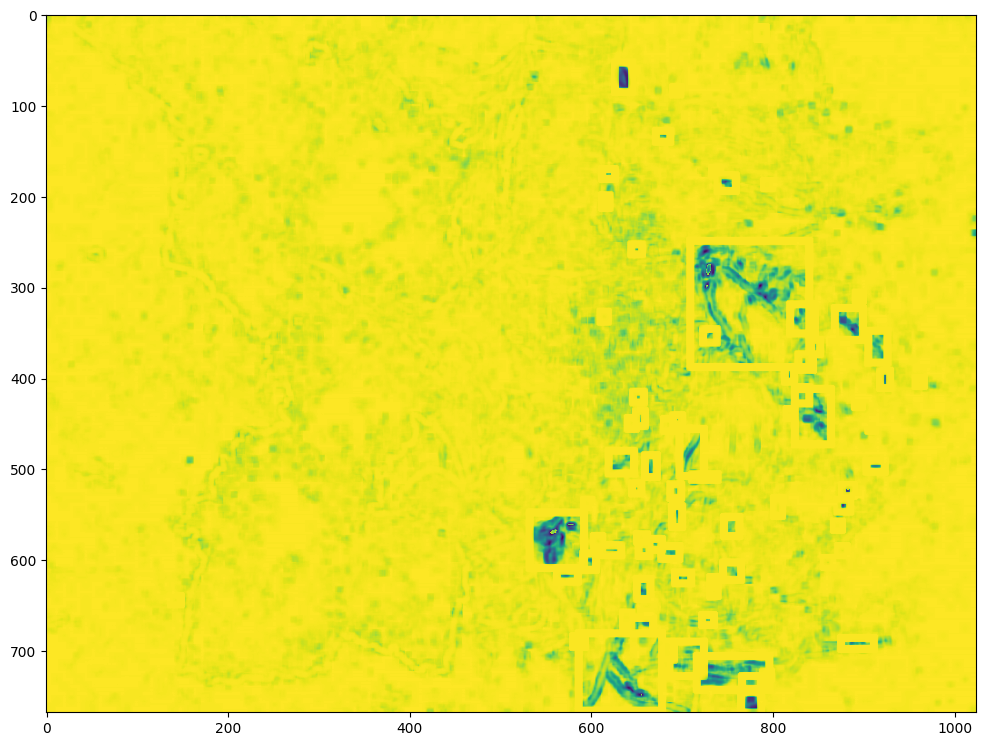

In [153]:
display(diff)

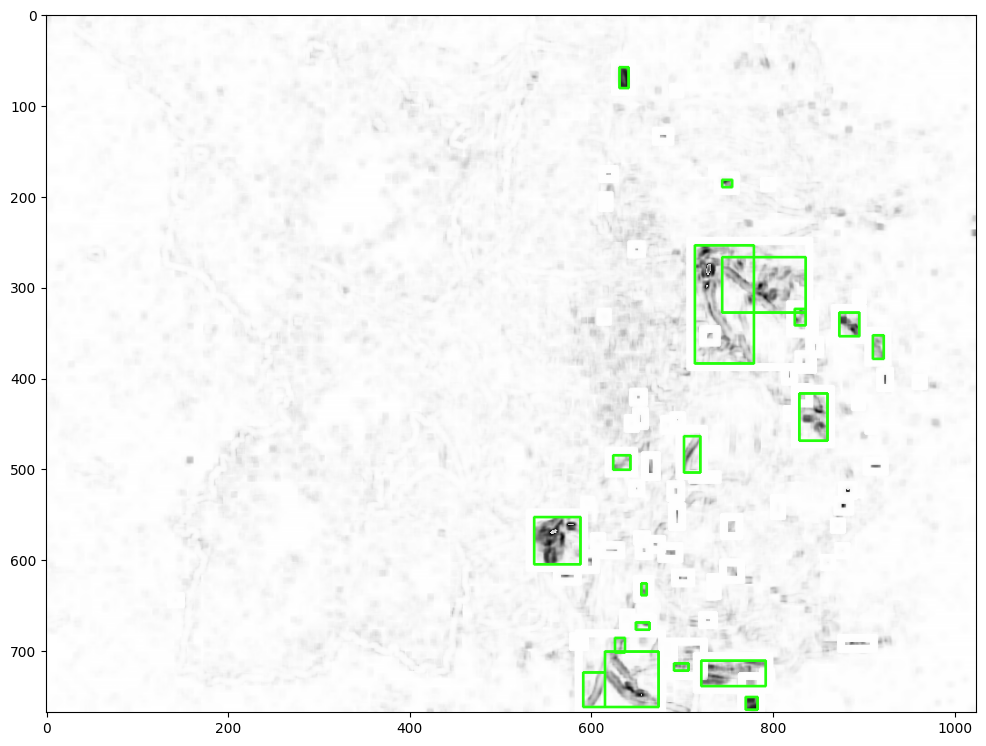

In [154]:
display(diff_box)

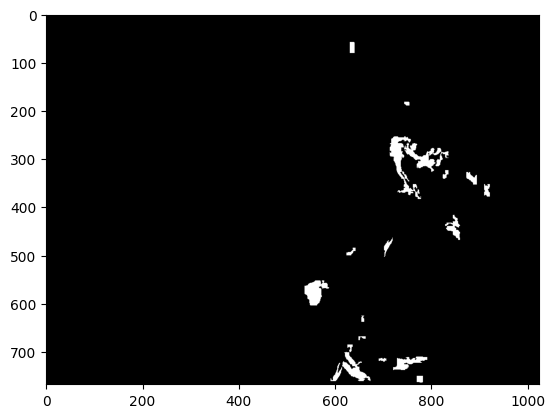

In [155]:
plt.imshow(mask)

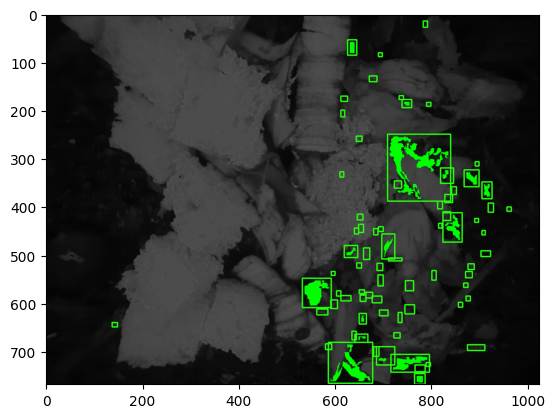

In [156]:
plt.imshow(filled_after)